In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Loading CSV files
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data= pd.read_csv(mouse_drug_data_to_load)
clinic_data = pd.read_csv(clinical_trial_data_to_load)
# Combine the data into a single dataset
joint_df = pd.merge(mouse_data,clinic_data, how = "outer", on = "Mouse ID" )

# Display the data table for preview

joint_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
group_df = joint_df.groupby(["Drug","Timepoint"])

group_df_mean = group_df.mean()

# Convert to DataFrame
group_df_mean = group_df_mean.reset_index()
#Deleting redundand column
del group_df_mean["Metastatic Sites"]
# Preview DataFrame
group_df_mean.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
group_se = group_df.sem ()

# Convert to DataFrame
group_se_df = pd.DataFrame(group_se)
#Resetting data frame index
group_se_df =  group_se_df.reset_index()
#Defining redundand colums
cols = [2,3]
#Removing redundant columns
group_se_df.drop(group_se_df.columns[cols],axis=1,inplace=True)

# Preview DataFrame

group_se_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames

reform_group_df = group_df_mean.pivot (index ="Timepoint", columns = "Drug", values = "Tumor Volume (mm3)")
reform_se_df= group_se_df.pivot(index="Timepoint", columns="Drug", values ="Tumor Volume (mm3)")

# Preview that Reformatting worked

reform_group_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


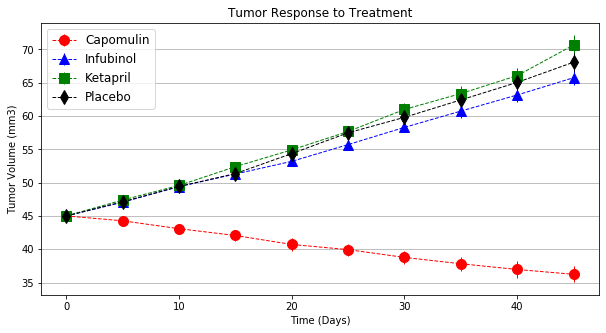

In [5]:
plt.figure(figsize = (10, 5))

#Defining x-axis values for each line
x_axis = reform_group_df.index

# Generate the Plot (with Error Bars)and passing required formats like label, linestyle, color etc

plt.errorbar(x_axis, reform_group_df["Capomulin"], yerr = reform_se_df["Capomulin"],
             color="r", marker="o", markersize=10, linestyle= "--", linewidth=1, label = "Capomulin")

plt.errorbar(x_axis, reform_group_df["Infubinol"], yerr = reform_se_df["Infubinol"],
             color="b", marker= "^", markersize=10, linestyle="--", linewidth=1, label = "Infubinol")

plt.errorbar(x_axis, reform_group_df["Ketapril"], yerr = reform_se_df["Ketapril"],
             color="g", marker="s", markersize=10, linestyle= "--", linewidth= 1, label = "Ketapril" )

plt.errorbar(x_axis, reform_group_df["Placebo"], yerr = reform_se_df["Placebo"],
             color="k", marker="d", markersize=10, linestyle= "--", linewidth=1, label = "Placebo")

#Setrting grid style (horizontal grid)
plt.grid("off", which="major", axis="y" )
#Labeling lims
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (Days)")
#Adding a title
plt.title("Tumor Response to Treatment")
#Adding Legend and setting its location and size
plt.legend( loc = 2, fontsize = "large" ) 
# Save the Figure
plt.savefig("treatment_1.png")
# Show the Figure
plt.show()


![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
group_met_site = joint_df.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"]

# Convert to DataFrame
group_met_df = pd.DataFrame(group_met_site)


# Preview DataFrame
group_met_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
group_met_se = joint_df.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"]

# Convert to DataFrame
group_met_se_df = pd.DataFrame(group_met_se)

# Preview DataFrame
group_met_se_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [8]:
# Minor Data Munging to Re-Format the Data Frames
#Reseting DF index
group_met_df = group_met_df.reset_index()
reform_met_df = group_met_df.pivot (index = "Timepoint", columns = "Drug", values ="Metastatic Sites")
#Resetting DF index
group_met_se_df  = group_met_se_df.reset_index()
reform_met_se_df  = group_met_se_df.pivot (index = "Timepoint" , columns = "Drug", values ="Metastatic Sites")

# Preview that Reformatting worked
reform_met_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


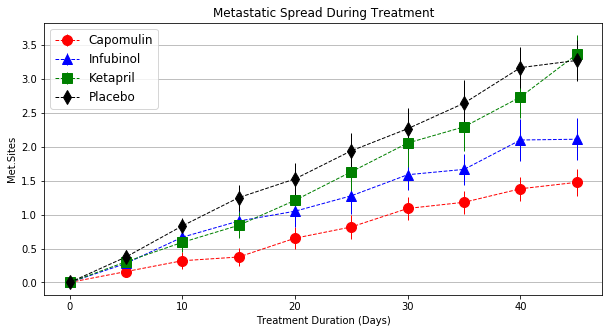

In [9]:
plt.figure(figsize = (10, 5))

#Defining x-axis values for each line
x_axis = reform_met_df.index

# Generate the Plot (with Error Bars) and passing required formats like label, linestyle, color etc
plt.errorbar(x_axis, reform_met_df["Capomulin"], yerr = reform_met_se_df["Capomulin"],
             color="r", marker="o", markersize=10, linestyle="--", linewidth=1, label = "Capomulin")

plt.errorbar(x_axis, reform_met_df["Infubinol"], yerr = reform_met_se_df["Infubinol"],
             color="b", marker="^", markersize=10, linestyle="--", linewidth=1, label = "Infubinol")

plt.errorbar(x_axis, reform_met_df["Ketapril"], yerr = reform_met_se_df["Ketapril"],
             color="g", marker="s", markersize=10, linestyle="--", linewidth= 1, label = "Ketapril" )

plt.errorbar(x_axis, reform_met_df["Placebo"], yerr = reform_met_se_df["Placebo"],

             color="k", marker="d", markersize=10, linestyle="--", linewidth=1, label = "Placebo")

#Setrting grid style (horizontal grid)
plt.grid('off', which='major', axis='y' )
#Labeling lims
plt.ylabel("Met.Sites")
plt.xlabel("Treatment Duration (Days)")
#Adding Title
plt.title("Metastatic Spread During Treatment")

#Adding Legend and setting its location and size
plt.legend( loc = 2, fontsize = "large" ) 

# Save the Figure
plt.savefig("spread_1.png")
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [10]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
surviv_rate = joint_df.groupby(["Drug", "Timepoint"]).count()["Metastatic Sites"]

# Convert to DataFrame

surviv_rate_df = pd.DataFrame({"Mouse Count": surviv_rate})
#Adding index
surviv_rate_df.reset_index(inplace=True)

# Preview DataFrame
surviv_rate_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [11]:
# Minor Data Munging to Re-Format the Data Frames
reform_surviv_df = surviv_rate_df.pivot (index = "Timepoint" , columns = "Drug", values ="Mouse Count")

# Preview the Data Frame
reform_surviv_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


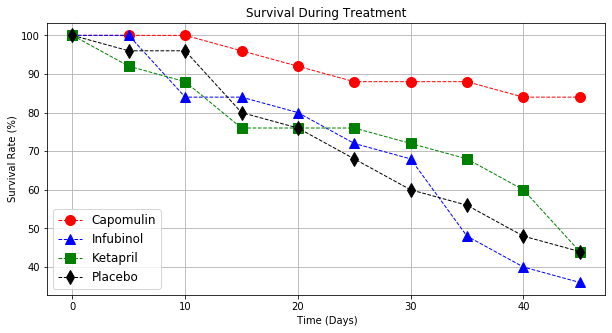

In [12]:
plt.figure(figsize = (10, 5))

# Generate the Plot (Accounting for percentages)

plt.plot(reform_surviv_df["Capomulin"] /25*100,
         color="r", marker="o",markersize=10, linestyle="--",linewidth=1,label ="Capomulin")
plt.plot(reform_surviv_df["Infubinol"] /25*100,
         color="b", marker="^", markersize=10, linestyle="--", linewidth=1, label = "Infubinol")
plt.plot(reform_surviv_df["Ketapril"] /25*100,
         color="g", marker="s", markersize=10, linestyle="--", linewidth= 1, label = "Ketapril")
plt.plot(reform_surviv_df["Placebo"] /25*100,
        color="k", marker="d", markersize=10, linestyle="--", linewidth=1, label = "Placebo")
#Setting a grid
plt.grid()
#Labeling lims
plt.ylabel("Survival Rate (%)")
plt.xlabel(" Time (Days)")
#Adding the Title
plt.title("Survival During Treatment")
#Adding Legend and setting its location and size
plt.legend( loc = 3, fontsize = "large" )

# Save the Figure

plt.savefig("survival_1.png")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [13]:
# Calculate the percent changes for each drug
percent_chng = (reform_group_df.iloc[9] - reform_group_df.iloc[0]) / reform_group_df.iloc[0]*100

# Display the data to confirm
percent_chng

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

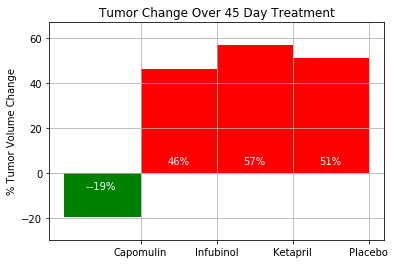

In [15]:
# Store all Relevant Percent Changes into a Tuple
data_perc = (percent_chng["Capomulin"], 
             percent_chng["Infubinol"], 
             percent_chng["Ketapril"], 
             percent_chng["Placebo"])  
         
 # Splice the data between passing and failing drugs
fig, ax = plt.subplots()
#Defining x-axis
x_axis = np.arange(len(data_perc))  
pass_drug = ax.bar(x_axis[0], data_perc[0], width =1, color='green')
fail_drug = ax.bar(x_axis[1:], data_perc[1:], width=1, color='red')

# Orient widths. Add labels, tick marks, etc. 
#Adding the grid
ax.grid()
#Adding the Title
ax.set_title("Tumor Change Over 45 Day Treatment")
#Labeling y lim label
ax.set_ylabel("% Tumor Volume Change")
#Adding and shifting tick marks
ax.set_xticks(x_axis + 0.5)
#Adding tick labels
ax.set_xticklabels(("Capomulin", "Infubinol", "Ketapril", "Placebo"))
#Defining the size of the y lim
ax.set_ylim([min(data_perc)-10,max(data_perc)+10])

# Use functions to label the percentages of changes
def autolabelFail(drug):
# Looping through bars on the bar chart to get their hights, convert them into integers and print on the bars in specific format and location     
    for i in drug:
        height = i.get_height()
        ax.text(i.get_x() + i.get_width()/2., 3,
                '%d%%' % int(height),
                ha='center', va='bottom', color="w")

def autolabelPass(drug):
    for i in drug:
        height = i.get_height()
        ax.text(i.get_x() + i.get_width()/2., -8,
                '-%d%% ' % int(height),
                ha='center', va='bottom', color="w")

# Call functions to implement the function calls
autolabelPass(pass_drug)
autolabelFail(fail_drug)

# Save the Figure

fig.savefig("change_1.png")

# Show the Figure
fig.show()
                                                                         

![Metastatic Spread During Treatment](../Images/change.png)